In [156]:
from fenics import *
import matplotlib.pyplot as plt

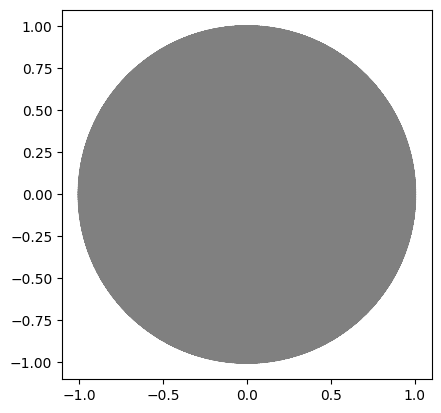

In [157]:
filename = "mesh/meshCircle"
mesh = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh, filename + "_physical_region.xml")
plot(mesh)

Solving linear variational problem.
Solving linear variational problem.
[0.05 0.05]
[0.0340414  0.03404139]


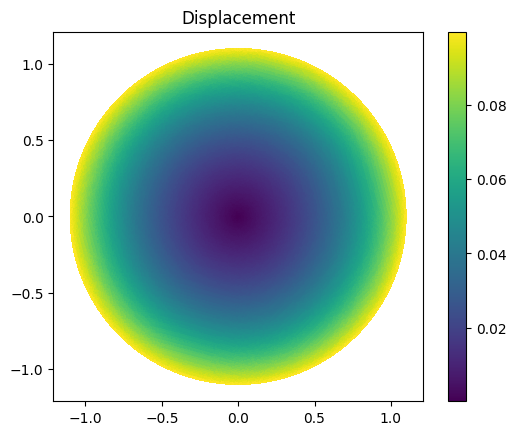

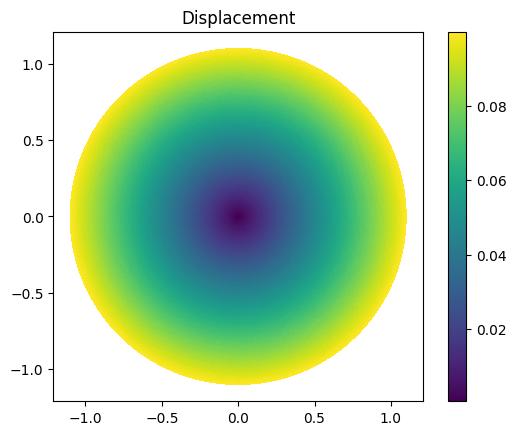

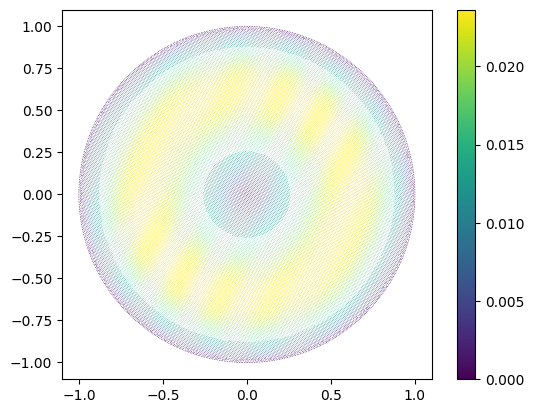

In [158]:
# Scaled variables
E = 1e3
nu = 0.3
mu = E / (2 * (1 + nu))
lambda_ = E * nu / ((1 + nu) * (1 - 2 * nu))

# Create mesh and define function space
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol
g = Expression(("0.1*x[0]/sqrt(x[0]*x[0]+x[1]*x[1])", "0.1*x[1]/sqrt(x[0]*x[0]+x[1]*x[1])"), degree=2)
bc = DirichletBC(V, g, bounds,1)


# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension() # space dimension
v = TestFunction(V)
f = Constant((0, 0))  # body force
T = Constant((0, 0))
q = 1e4
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

a2 = inner(sigma(u), epsilon(v))*dx + q*inner(u, v)*dx

# Compute solution
u = Function(V)
uq = Function(V)
solve(a == L, u, bc)
solve(a2 == L, uq, bc)
print(u(0.5, 0.5))
print(uq(0.5, 0.5))
# Plot solution
sol = plot(uq, title='Displacement', mode='displacement')
plt.colorbar(sol)
plt.show()
sol2 = plot(u, title='Displacement', mode='displacement')
plt.colorbar(sol2)
plt.show()

diff = Function(V)
diff.assign(u-uq)
sol3 = plot(diff)
plt.colorbar(sol3)

## No friction


Solving linear variational problem.


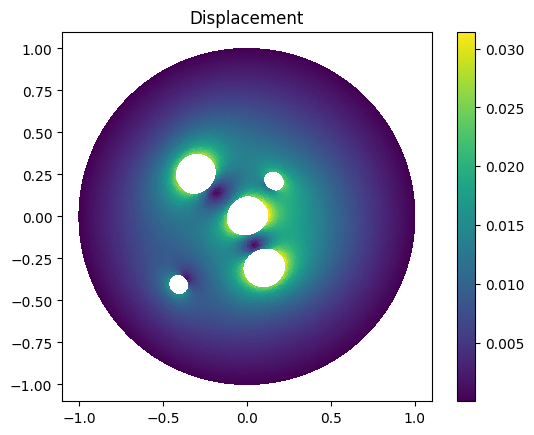

In [159]:

# # Create mesh and define function space
filename = "mesh/meshHoles"
mesh_init = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh_init, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh_init, filename + "_physical_region.xml")

# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

V = VectorFunctionSpace(mesh_init, 'P', 1)
bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
g = Expression(("-0.01*(x[0]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))", "-0.01*(x[1]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))"), degree=2)
bc_in = DirichletBC(V, g, bounds, 4)
bcs = [bc_out, bc_in]
utrial = TrialFunction(V)
v2 = TestFunction(V)
uh = interpolate(u, V)
a = inner(sigma(utrial), epsilon(v2))*dx
L = -inner(sigma(uh), epsilon(v2))*dx

for t in range(5):
# Compute solution
    u2 = Function(V)
    solve(a == L, u2, bcs)

    # Plot solution
    sol = plot(u2, title='Displacement', mode='displacement')
    u_noq = u2.copy()
    plt.colorbar(sol)
    plt.show()
    # uh.assign(u2)
    ALE.move(mesh_init, u2)

    V = VectorFunctionSpace(mesh_init, 'P', 1)
    bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
    g = Expression(("-0.01*(x[0]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))", "-0.01*(x[1]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))"), degree=2)
    bc_in = DirichletBC(V, g, bounds, 4)
    bcs = [bc_out, bc_in]
    utrial = TrialFunction(V)
    v2 = TestFunction(V)
    uh = interpolate(u2, V)
    a = inner(sigma(utrial), epsilon(v2))*dx
    L = inner(sigma(uh), epsilon(v2))*dx


## Friction


Solving linear variational problem.


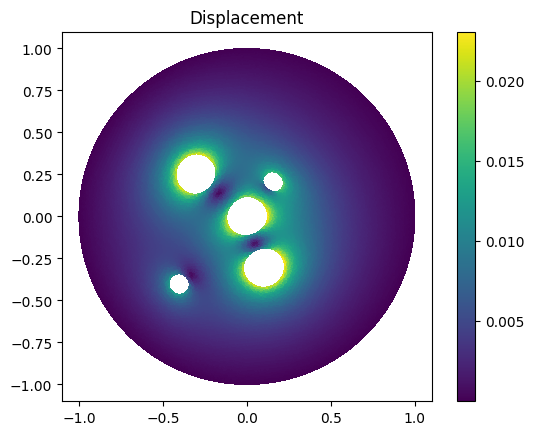

In [160]:

# Create mesh and define function space
filename = "mesh/meshHoles"
mesh_init = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh_init, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh_init, filename + "_physical_region.xml")
V = VectorFunctionSpace(mesh_init, 'P', 1)

bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
bcs = [bc_out]

# closure of small holes
g = Expression(("-0.01*(x[0]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))", "-0.01*(x[1]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))"), degree=2)
bc_in = DirichletBC(V, g, bounds, 4)
bcs = [bc_out,bc_in]

# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)


# Define variational problem
utrial = TrialFunction(V)
v2 = TestFunction(V)
q = 1e4
f = Constant((0, 0))  # body force
# uh = interpolate(u, V)
a =  inner(sigma(utrial), epsilon(v2))*dx + q*inner(utrial,v2)*dx
L = -inner(sigma(uh), epsilon(v2))*dx

# Compute solution
    
u3 = Function(V)

solve(a == L, u3, bcs)

# Plot solution
sol = plot(u3, title='Displacement', mode='displacement')
plt.colorbar(sol)
plt.show()

# ALE.move(mesh_init, u3)

for t in range(5):
# Compute solution
    
    u3 = Function(V)
    solve(a == L, u3, bcs)

    # Plot solution
    sol = plot(u3, title='Displacement', mode='displacement')
    plt.colorbar(sol)
    plt.show()
    # uh.assign(u3)
    ALE.move(mesh_init, u3)

    V = VectorFunctionSpace(mesh_init, 'P', 1)
    bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
    bc_in = DirichletBC(V, g, bounds, 4)
    bcs = [bc_out, bc_in]
    utrial = TrialFunction(V)
    v2 = TestFunction(V)
    uh0 = interpolate(u, V)
    uh = interpolate(uh, V)
    a =  inner(sigma(utrial), epsilon(v2))*dx + q*inner(utrial,v2)*dx # + inner(u3,v2)*dx
    L =  inner(sigma(uh0), epsilon(v2))*dx 

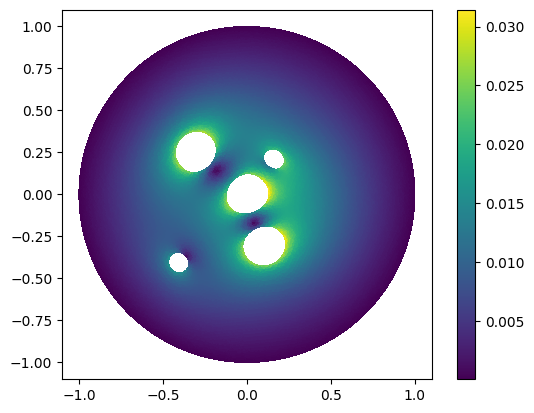

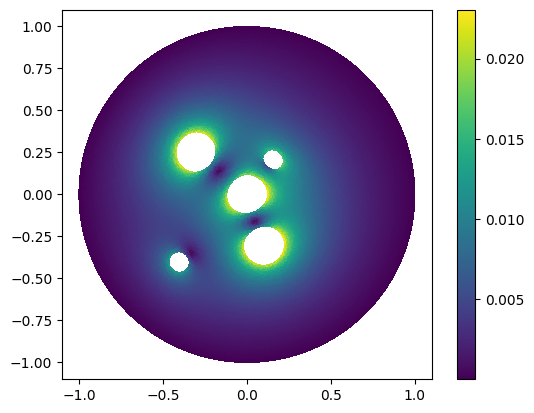

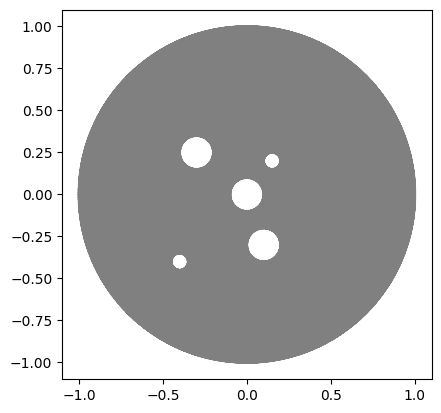

In [161]:
plot1 = plot(u2,  mode='displacement')
plt.colorbar(plot1)
plt.show()
plot2 = plot(u3, mode='displacement')
plt.colorbar(plot2)
plt.show()
plot(mesh_init)
plt.show()

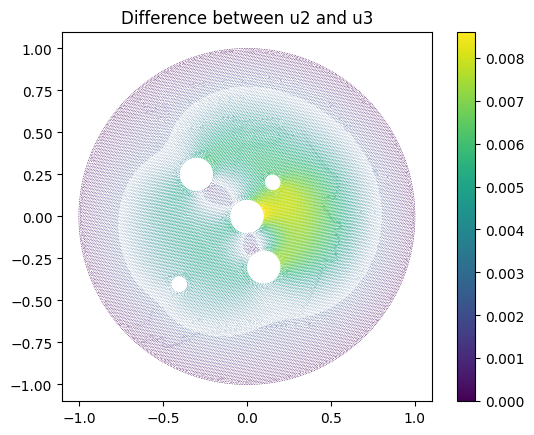

In [162]:
diff = Function(V)
diff.assign(u2 - u3)

# Plot the difference
sol = plot(diff, title='Difference between u2 and u3')#mode='displacement')
plt.colorbar(sol)
plt.show()

## iterations